 # SVM from Scratch Experiment



 This notebook demonstrates the use of the Support Vector Machine (SVM) algorithm implemented from scratch.



 We will load the processed breast cancer dataset, train the SVM model, and evaluate its performance using accuracy, precision, recall, and F1 score. A confusion matrix will be plotted to visualize the results.

In [12]:
import os
import sys

import numpy as np

# Set project root directory and add it to the system path
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(project_root)


from src.scratch.models.svm import SVM
from src.scratch.utils.metrics import (
    accuracy,
    compute_roc_auc_score,
    f1_score,
    precision_score,
    recall_score,
)
from src.scratch.utils.viz_utils import (
    plot_confusion_matrix,
    plot_precision_recall_curve,
    plot_roc_curve,
)

# Load the processed data
X_train = np.load("../../../data/processed/breast_cancer_X_train.npy")
y_train = np.load("../../../data/processed/breast_cancer_y_train_svm.npy")
X_test = np.load("../../../data/processed/breast_cancer_X_test.npy")
y_test = np.load("../../../data/processed/breast_cancer_y_test_svm.npy")

 ## Data Exploration



 The breast cancer dataset contains features derived from digitized images of breast mass aspirates. The labels are binary (-1, 1), suitable for SVM classification.

In [13]:
# Print data shapes
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (456, 30)
Training labels shape: (456,)
Test data shape: (113, 30)
Test labels shape: (113,)


 ## Model Training



 We initialize the SVM model with a linear kernel and train it on the dataset.

In [14]:
# Initialize the SVM model
model = SVM(C=1000.0, kernel='linear', tol=1e-5, max_passes=20, verbose=True)

# Train the model
model.fit(X_train, y_train)


Epoch 1: Updated alphas at i=0, j=1
Epoch 1: Updated alphas at i=2, j=0
Epoch 1: Updated alphas at i=3, j=0
Epoch 1: Updated alphas at i=5, j=3
Epoch 1: Updated alphas at i=7, j=0
Epoch 1: Updated alphas at i=8, j=7
Epoch 1: Updated alphas at i=9, j=8
Epoch 1: Updated alphas at i=10, j=8
Epoch 1: Updated alphas at i=11, j=8
Epoch 1: Updated alphas at i=12, j=8
Epoch 1: Updated alphas at i=13, j=8
Epoch 1: Updated alphas at i=14, j=8
Epoch 1: Updated alphas at i=19, j=8
Epoch 1: Updated alphas at i=22, j=8
Epoch 1: Updated alphas at i=24, j=8
Epoch 1: Updated alphas at i=25, j=8
Epoch 1: Updated alphas at i=30, j=8
Epoch 1: Updated alphas at i=31, j=30
Epoch 1: Updated alphas at i=32, j=30
Epoch 1: Updated alphas at i=33, j=8
Epoch 1: Updated alphas at i=35, j=8
Epoch 1: Updated alphas at i=38, j=8
Epoch 1: Updated alphas at i=39, j=8
Pass 1/20: Changed 23 alphas
Pass 2/20: Changed 0 alphas
Pass 3/20: Changed 0 alphas
Pass 4/20: Changed 0 alphas
Pass 5/20: Changed 0 alphas
Pass 6/20: Ch

 ## Model Evaluation



 We predict on the test set and compute evaluation metrics.

In [15]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = compute_roc_auc_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.9735
Precision: 1.0000
Recall: 0.9302
F1 Score: 0.9639
ROC AUC: 0.9651


 ## Visualization



 We plot the confusion matrix to visualize the model's performance.

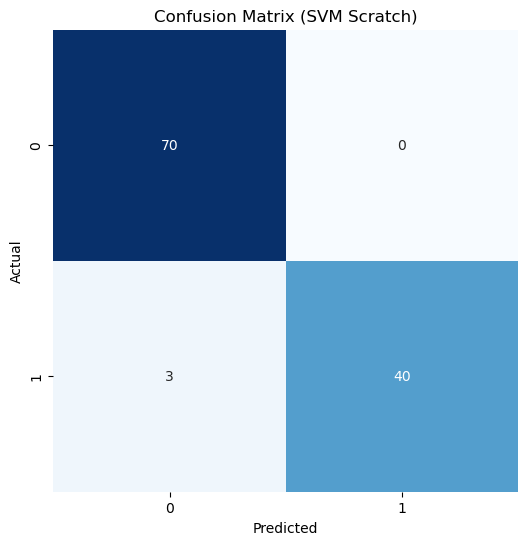

In [16]:
# Plot confusion matrix
plot_confusion_matrix(y_test, predictions,title="Confusion Matrix (SVM Scratch)")

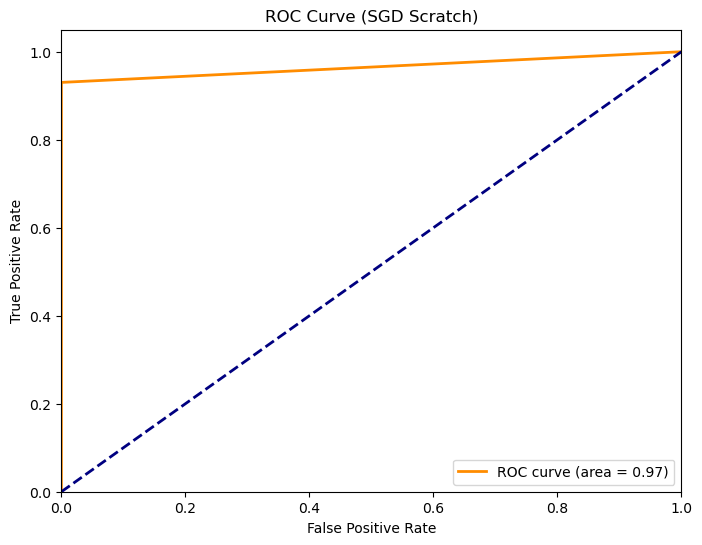

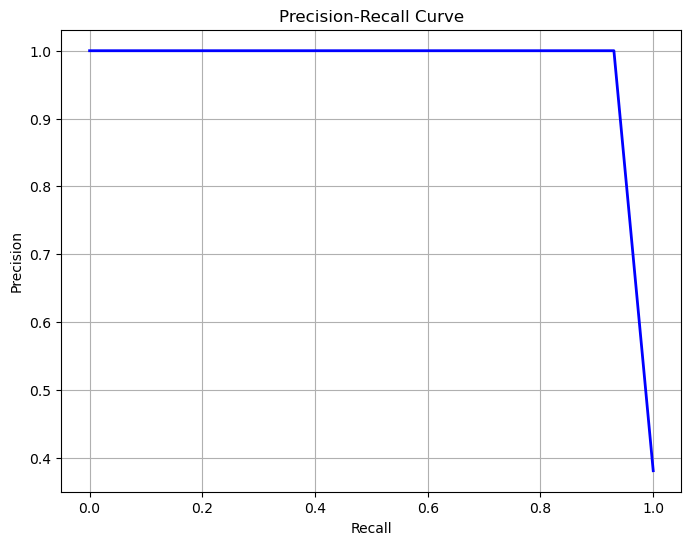

In [17]:
plot_roc_curve(
    y_test,
    predictions,
    title="ROC Curve (SGD Scratch)",
    filename="roc_curve_sgd_scratch.png",
)
plot_precision_recall_curve(y_test, predictions)